<a href="https://www.kaggle.com/code/p4rlxdev/spaceship-titanic-nullzero-fastai-2022?scriptVersionId=120070313" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [18]:
#Use the Path module to highight
pd.options.display.float_format = '{:.2f}'.format
path = Path('/kaggle/input/spaceship-titanic')

In [19]:
print(path)
df_train = pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')

/kaggle/input/spaceship-titanic


In [29]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [31]:
df_train['HomePlanet'].unique()



array(['Europa', 'Earth', 'Mars', nan], dtype=object)

Fill all NA Values with the mode across all columns in place


In [34]:
modes = df_train.mode().iloc[0]
modes

PassengerId                0001_01
HomePlanet                   Earth
CryoSleep                    False
Cabin                      G/734/S
Destination            TRAPPIST-1e
Age                          24.00
VIP                          False
RoomService                   0.00
FoodCourt                     0.00
ShoppingMall                  0.00
Spa                           0.00
VRDeck                        0.00
Name            Alraium Disivering
Transported                   True
Name: 0, dtype: object

In [35]:
df_train.fillna(modes, inplace=True)

Doneski!

In [36]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [38]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


Future feature engineering:
- Drop Destination?
- Add 1 to any 0's unless done in the dls


In [1]:
splits = RandomSplitter(seed=42)(df_train)

NameError: name 'RandomSplitter' is not defined

In [44]:
dls = TabularPandas(
    df_train, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["PassengerId","HomePlanet", "CryoSleep","Cabin"],
    cont_names=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
    y_names="Transported", y_block = CategoryBlock(),
).dataloaders(path=".")

The data and model together make up a Learner. To create one, we say what the data is (dls), and the size of each hidden layer ([10,10]), along with any metrics we want to print along the way:

In [45]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.0691830962896347, valley=0.007585775572806597)

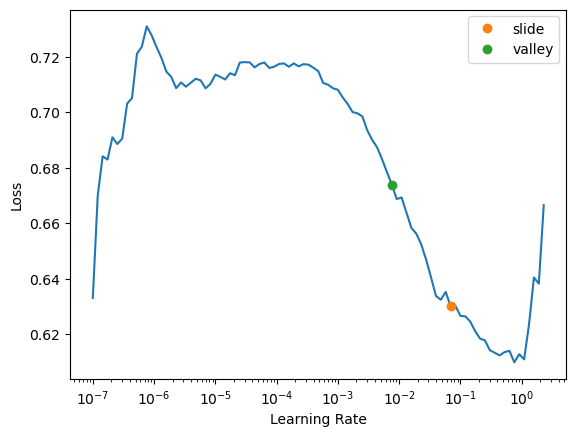

In [46]:
learn.lr_find(suggest_funcs=(slide, valley))

In [49]:
learn.fit(16, lr=0.06)

epoch,train_loss,valid_loss,accuracy,time
0,0.025948,1.011598,0.755466,00:04
1,0.040330,0.709700,0.772152,00:04
2,0.047322,0.745577,0.760644,00:04
3,0.043995,0.643194,0.769275,00:04
4,0.030000,1.110624,0.753740,00:04
5,0.022846,1.020747,0.769275,00:04
6,0.012942,1.135262,0.761220,00:04
7,0.014930,1.051372,0.765823,00:04
8,0.017502,0.996033,0.749712,00:04
9,0.025858,1.109720,0.738205,00:04


In [82]:
df_test = pd.read_csv(path/'test.csv')
modes = df_test.modes().iloc[0]
modes



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


463902.0

In [56]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [79]:
df_test.fillna(modes, inplace=True)

In [80]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


Data loader for the test data

In [86]:
dl_test = learn.dls.test_dl(df_test)

AssertionError: nan values in `Age` but not in setup training set

In [62]:
preds,_ = learn.get_preds(dl=dl_test)

In [84]:
df_test['Transported'] = (preds[:,1]>0.5).int()
sub_df = df_test[['PassengerId','Transported']]



TypeError: int() argument must be a string, a bytes-like object or a number, not 'DataFrame'

In [74]:
sub_df.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [75]:
!head my_submission.csv

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
PassengerId,Transported
0013_01,1
0018_01,0
0019_01,1
0021_01,1
0023_01,0
0027_01,0
0029_01,1
0032_01,1
0032_02,1


Ideas for improvement
- Cast result to integer
- Confirm that result should be an integer and not a Boolean
- Check rules
- confirm dls format
- Feature engineering of the first.
- Take seed out of line 39